In [195]:
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import random

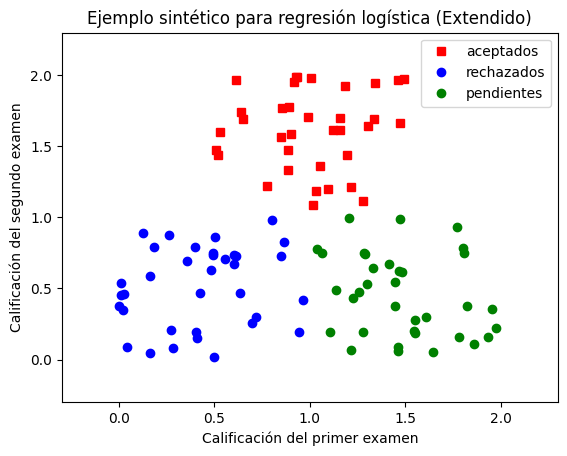

In [199]:
np.random.seed(random.randint(0, 10000))
x = np.random.randn(35, 2)
y = np.random.choice([0, 1, 2], size=35)

# Generar 100 puntos adicionales para cada clase
random_points_class0 = np.random.rand(35, 2) * np.array([1, 1])
random_points_class1 = np.random.rand(35, 2) * np.array([1, 1]) + np.array([0.5, 1])
random_points_class2 = np.random.rand(35, 2) * np.array([1, 1]) + np.array([1, 0])

x_extended = np.vstack([random_points_class0, random_points_class1, random_points_class2])
y_extended = np.repeat([0, 1, 2], 35)

# Graficar los datos extendidos
plt.plot(x_extended[y_extended == 1, 0], x_extended[y_extended == 1, 1], 'sr', label='aceptados')
plt.plot(x_extended[y_extended == 0, 0], x_extended[y_extended == 0, 1], 'ob', label='rechazados')
plt.plot(x_extended[y_extended == 2, 0], x_extended[y_extended == 2, 1], 'go', label='pendientes')
plt.title(u'Ejemplo sintético para regresión logística (Extendido)')
plt.xlabel(u'Calificación del primer examen')
plt.ylabel(u'Calificación del segundo examen')
plt.axis([-0.3, 2.3, -0.3, 2.3])
plt.legend(loc=0)
plt.show()

In [200]:
def softmax(z):
    max_z = np.max(z)
    eta = z - max_z
    log_softmax = eta - np.log(np.sum(np.exp(eta), axis=1, keepdims=True))
    softmax_result = np.exp(log_softmax)
    return softmax_result

def costo(y_true, y_pred):
    M = y_true.shape[0]
    cost = -(1/M) * np.sum(np.sum(y_true * np.log(y_pred + 1e-15)))
    return cost

def gradiente(x, y_true, y_pred):
    M = y_true.shape[0]
    deltaw = np.dot(x.T, (y_pred - y_true)) / M
    deltab = np.sum(y_pred - y_true, axis=0) / M
    return deltaw, deltab

Época 9999: Costo = 0.023897710508188817, LR = 1


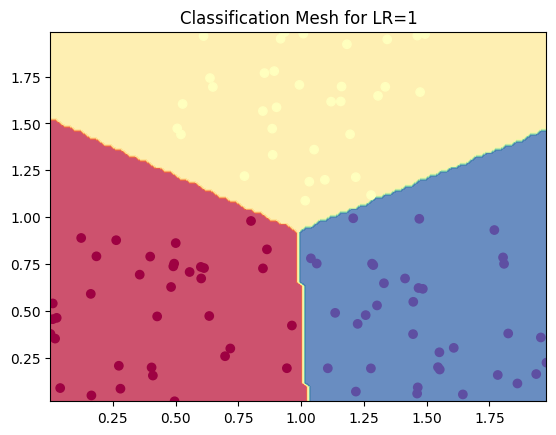

Época 9999: Costo = 0.025181730997855416, LR = 0.9


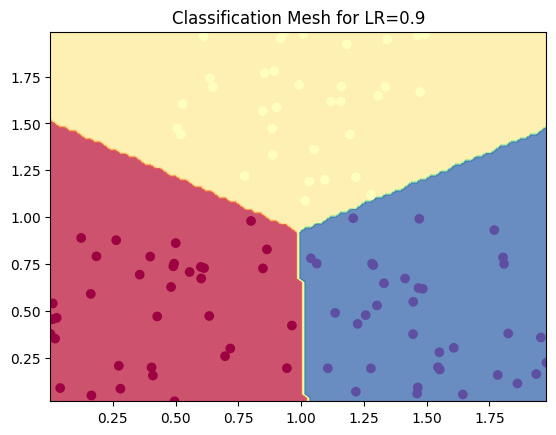

Época 9999: Costo = 0.026657134409116823, LR = 0.8


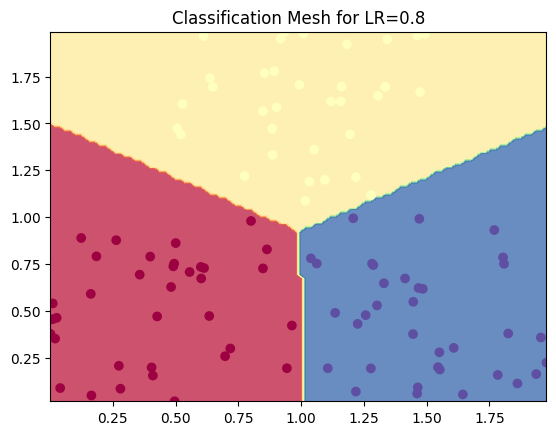

Época 9999: Costo = 0.06229001749927599, LR = 0.1


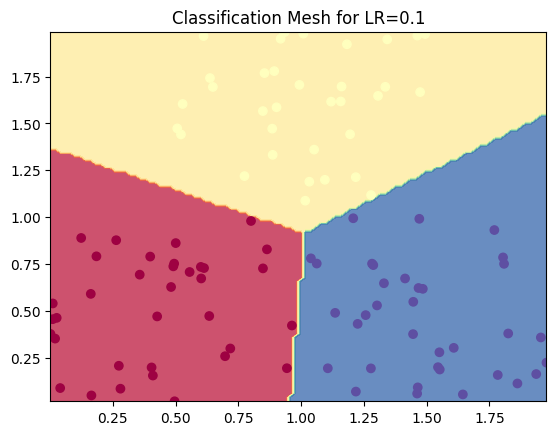

Época 9999: Costo = 0.1757853995300876, LR = 0.01


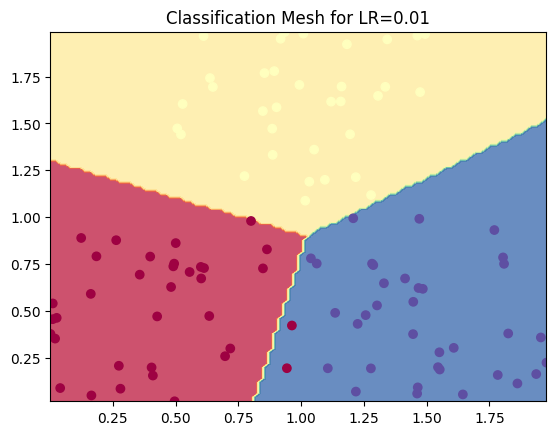

In [210]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_extended)

encoder = OneHotEncoder(sparse_output=False)
y_oh = encoder.fit_transform(y_encoded.reshape(-1, 1))

learning_rates = [1, 0.9, 0.8, 0.1, 0.01]
cost_per_epoch_list = []

for lr in learning_rates:
    np.random.seed(0)
    w = np.random.randn(x_extended.shape[1], y_oh.shape[1]) * np.sqrt(2 / (x_extended.shape[1] + y_oh.shape[1]))
    b = np.zeros(y_oh.shape[1])

    epochs = 10000

    for epoch in range(epochs):
        z = np.dot(x_extended, w) + b
        y_pred = softmax(z)

        cost = costo(y_oh, y_pred)

        dw, db = gradiente(x_extended, y_oh, y_pred)

        w -= lr * dw
        b -= lr * db

    cost_per_epoch_list.append(cost)  # Append cost for this epoch to the list
    print(f"Época {epoch}: Costo = {cost}, LR = {lr}")

    xx, yy = np.meshgrid(np.linspace(x_extended[:, 0].min(), x_extended[:, 0].max(), 100),
                         np.linspace(x_extended[:, 1].min(), x_extended[:, 1].max(), 100))
    Z = np.dot(np.c_[xx.ravel(), yy.ravel()], w) + b
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(x_extended[:, 0], x_extended[:, 1], c=y_extended, cmap=plt.cm.Spectral)
    plt.title(f'Classification Mesh for LR={lr}')

    plt.show()